<a href="https://colab.research.google.com/github/kellypatelab/PSGL-1-contributes-to-platelet-monocyte-aggregate/blob/main/CytokineDataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import scipy
from sklearn import decomposition
import matplotlib.pyplot as plt
from scipy import linalg
import seaborn as sns

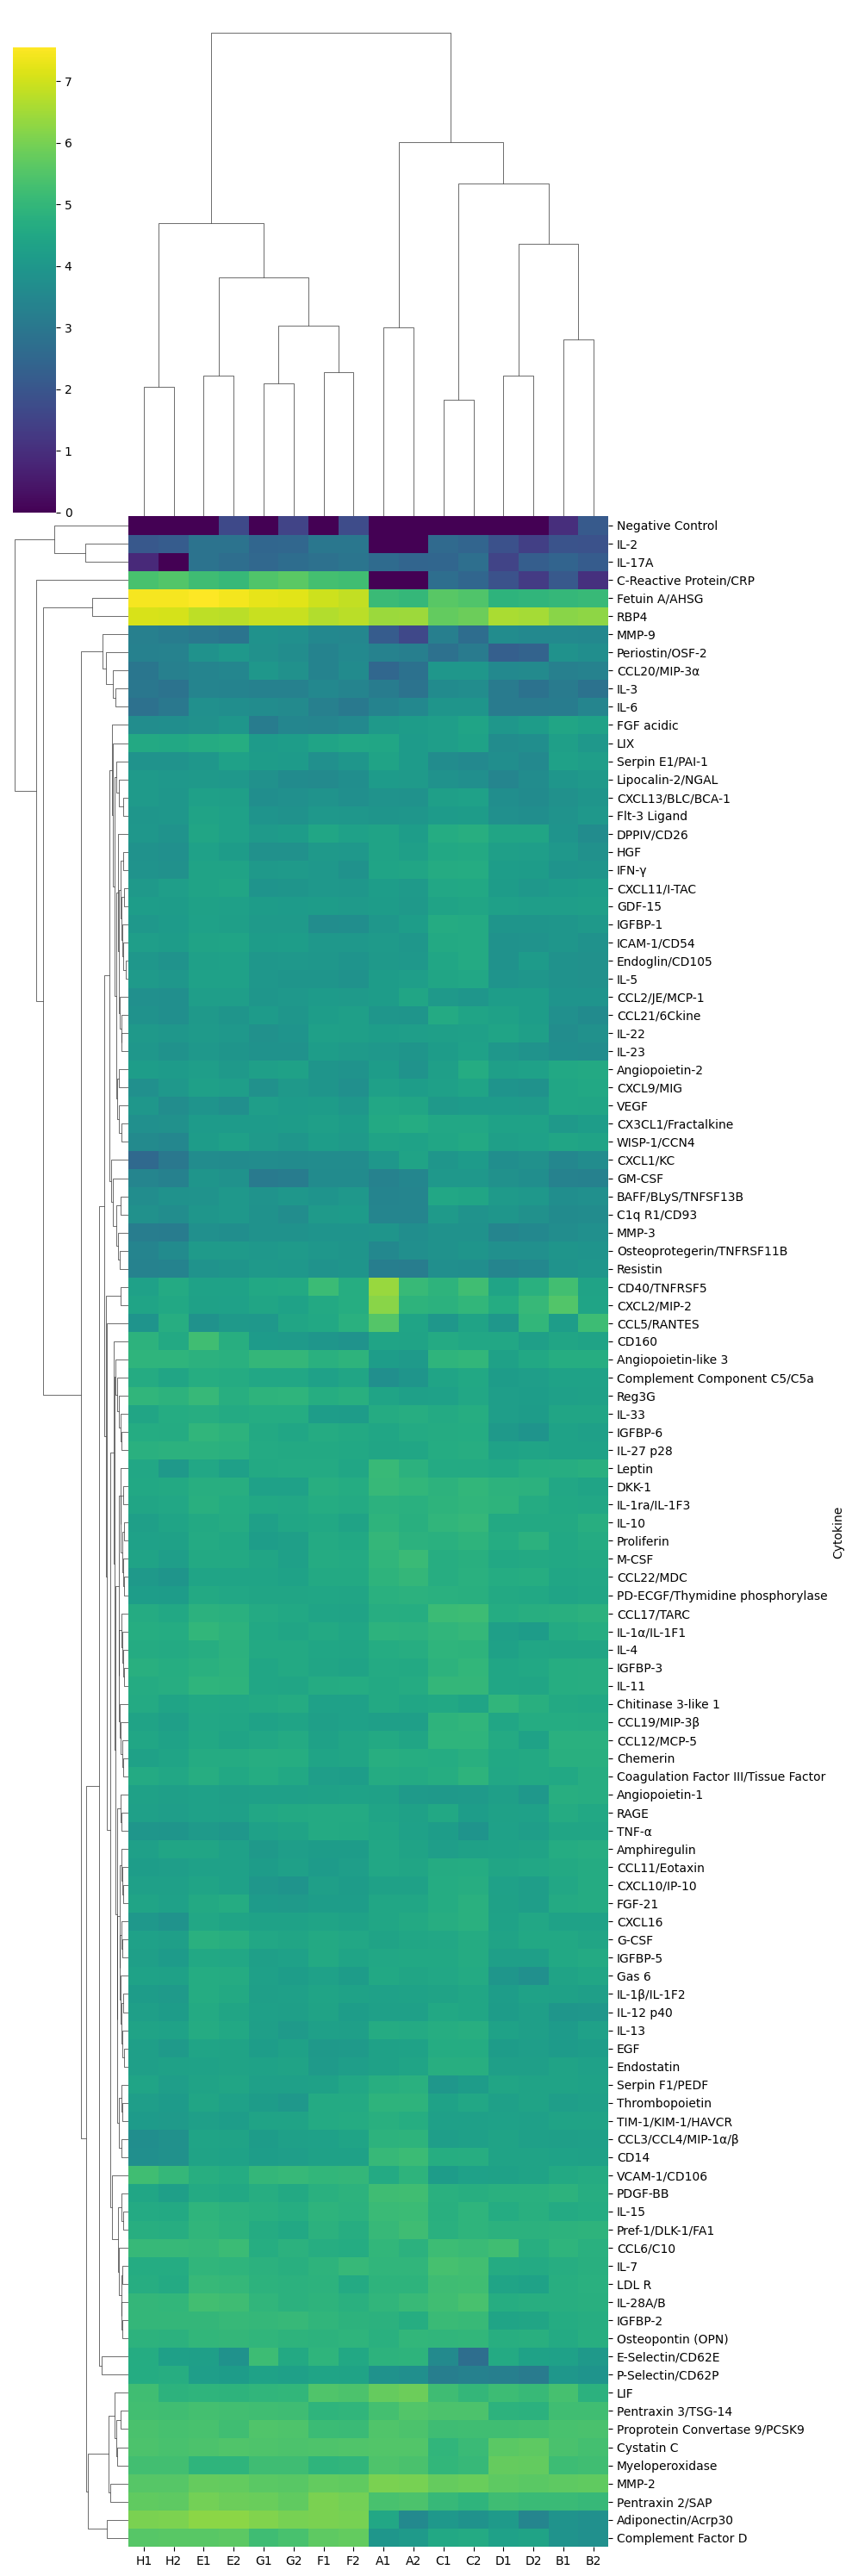

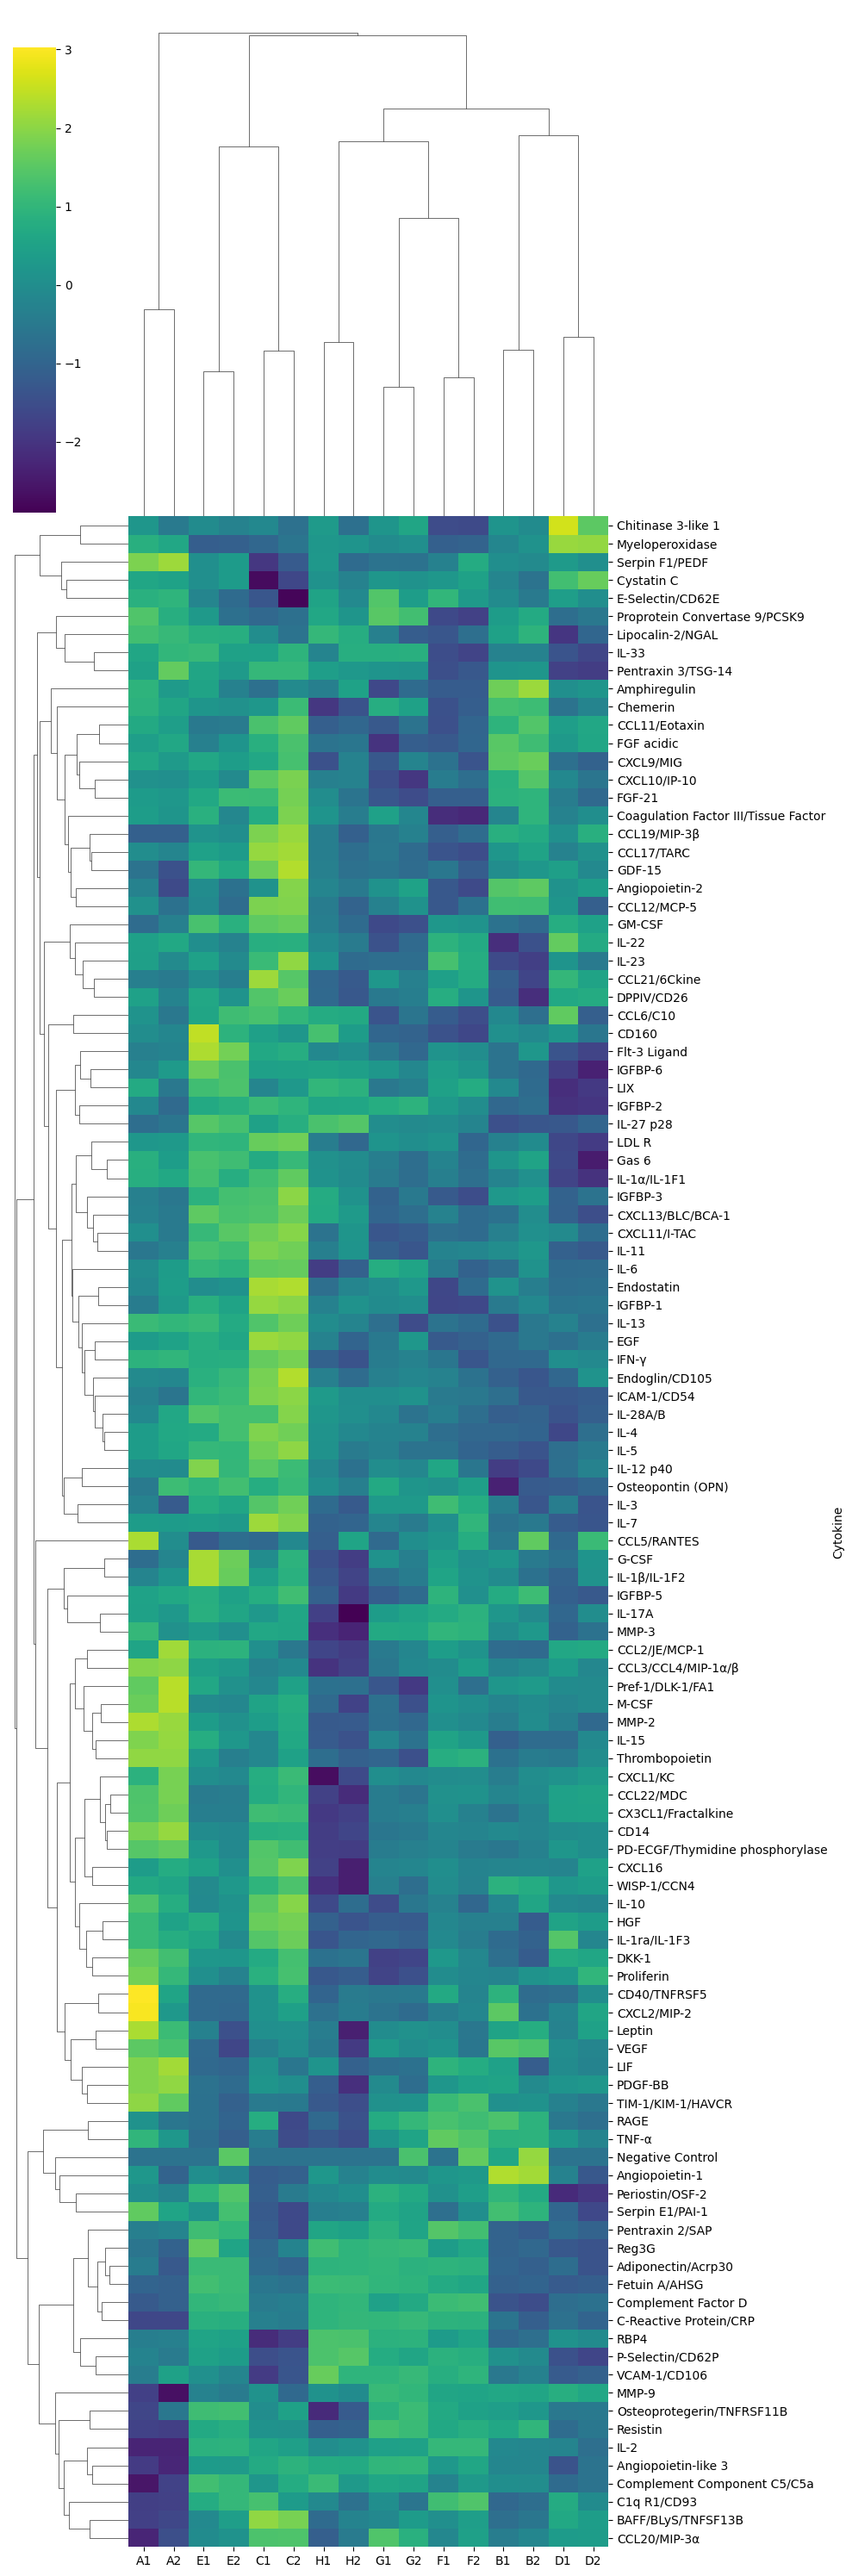

In [ ]:
data = pd.read_excel('YC Cytokine Array Data.xlsx')
data = data.set_index(data.Cytokine)
data = data.drop(['Cytokine'], axis=1)

data_noneg = data.copy()
data_noneg[data_noneg < 0] = 0

data_logtransformed = np.log(data_noneg+1)
sns.clustermap(data_logtransformed, figsize=(10, 30), cmap='viridis')

from scipy.stats import zscore
data_logtransformed_zscored = zscore(data_logtransformed, axis=1)
sns.clustermap(data_logtransformed_zscored, figsize=(10, 30), cmap='viridis')

<ipython-input-3-6b686d119092>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(y=explained_variance,x=[str(x+1) for x in np.arange(len(explained_variance))], palette='viridis')


Cytokine
IFN-γ                              0.156033
IL-10                              0.154425
HGF                                0.149853
CCL17/TARC                         0.146045
CXCL16                             0.145913
EGF                                0.144954
IL-13                              0.143684
PD-ECGF/Thymidine phosphorylase    0.139622
IL-5                               0.138821
RBP4                              -0.136087
Name: PC1, dtype: float64
Cytokine
Complement Component C5/C5a   -0.183563
Angiopoietin-like 3           -0.172731
IL-27 p28                     -0.165289
PDGF-BB                        0.163619
IGFBP-2                       -0.159170
Fetuin A/AHSG                 -0.157160
Leptin                         0.156181
VEGF                           0.153175
Reg3G                         -0.145884
Adiponectin/Acrp30            -0.143582
Name: PC2, dtype: float64


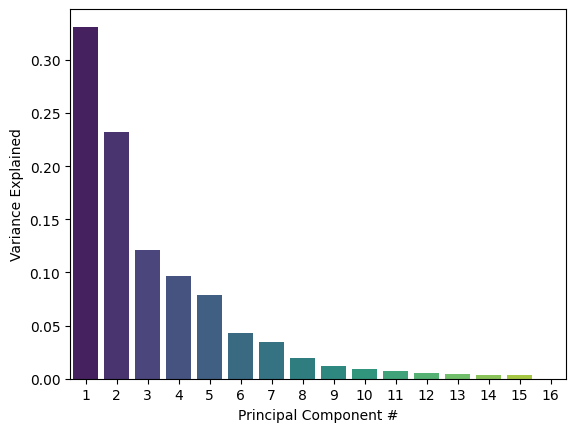

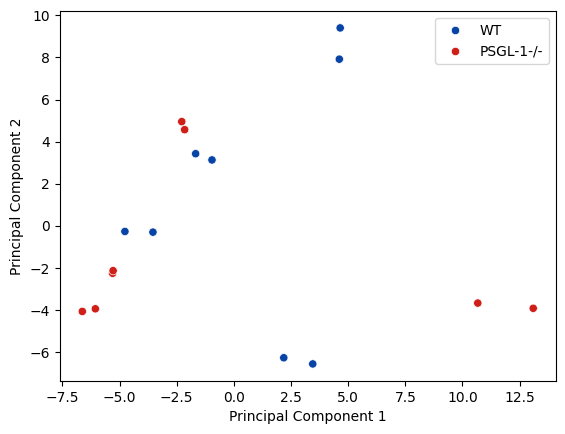

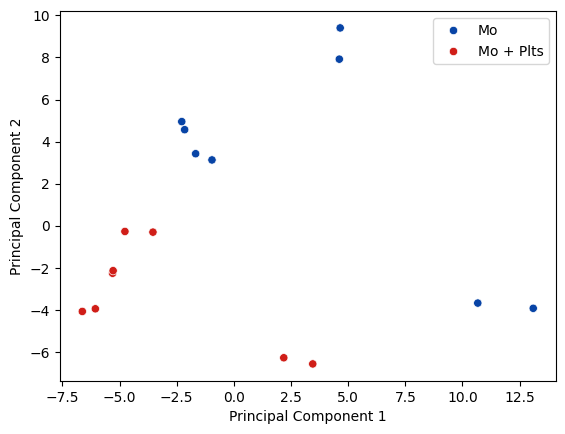

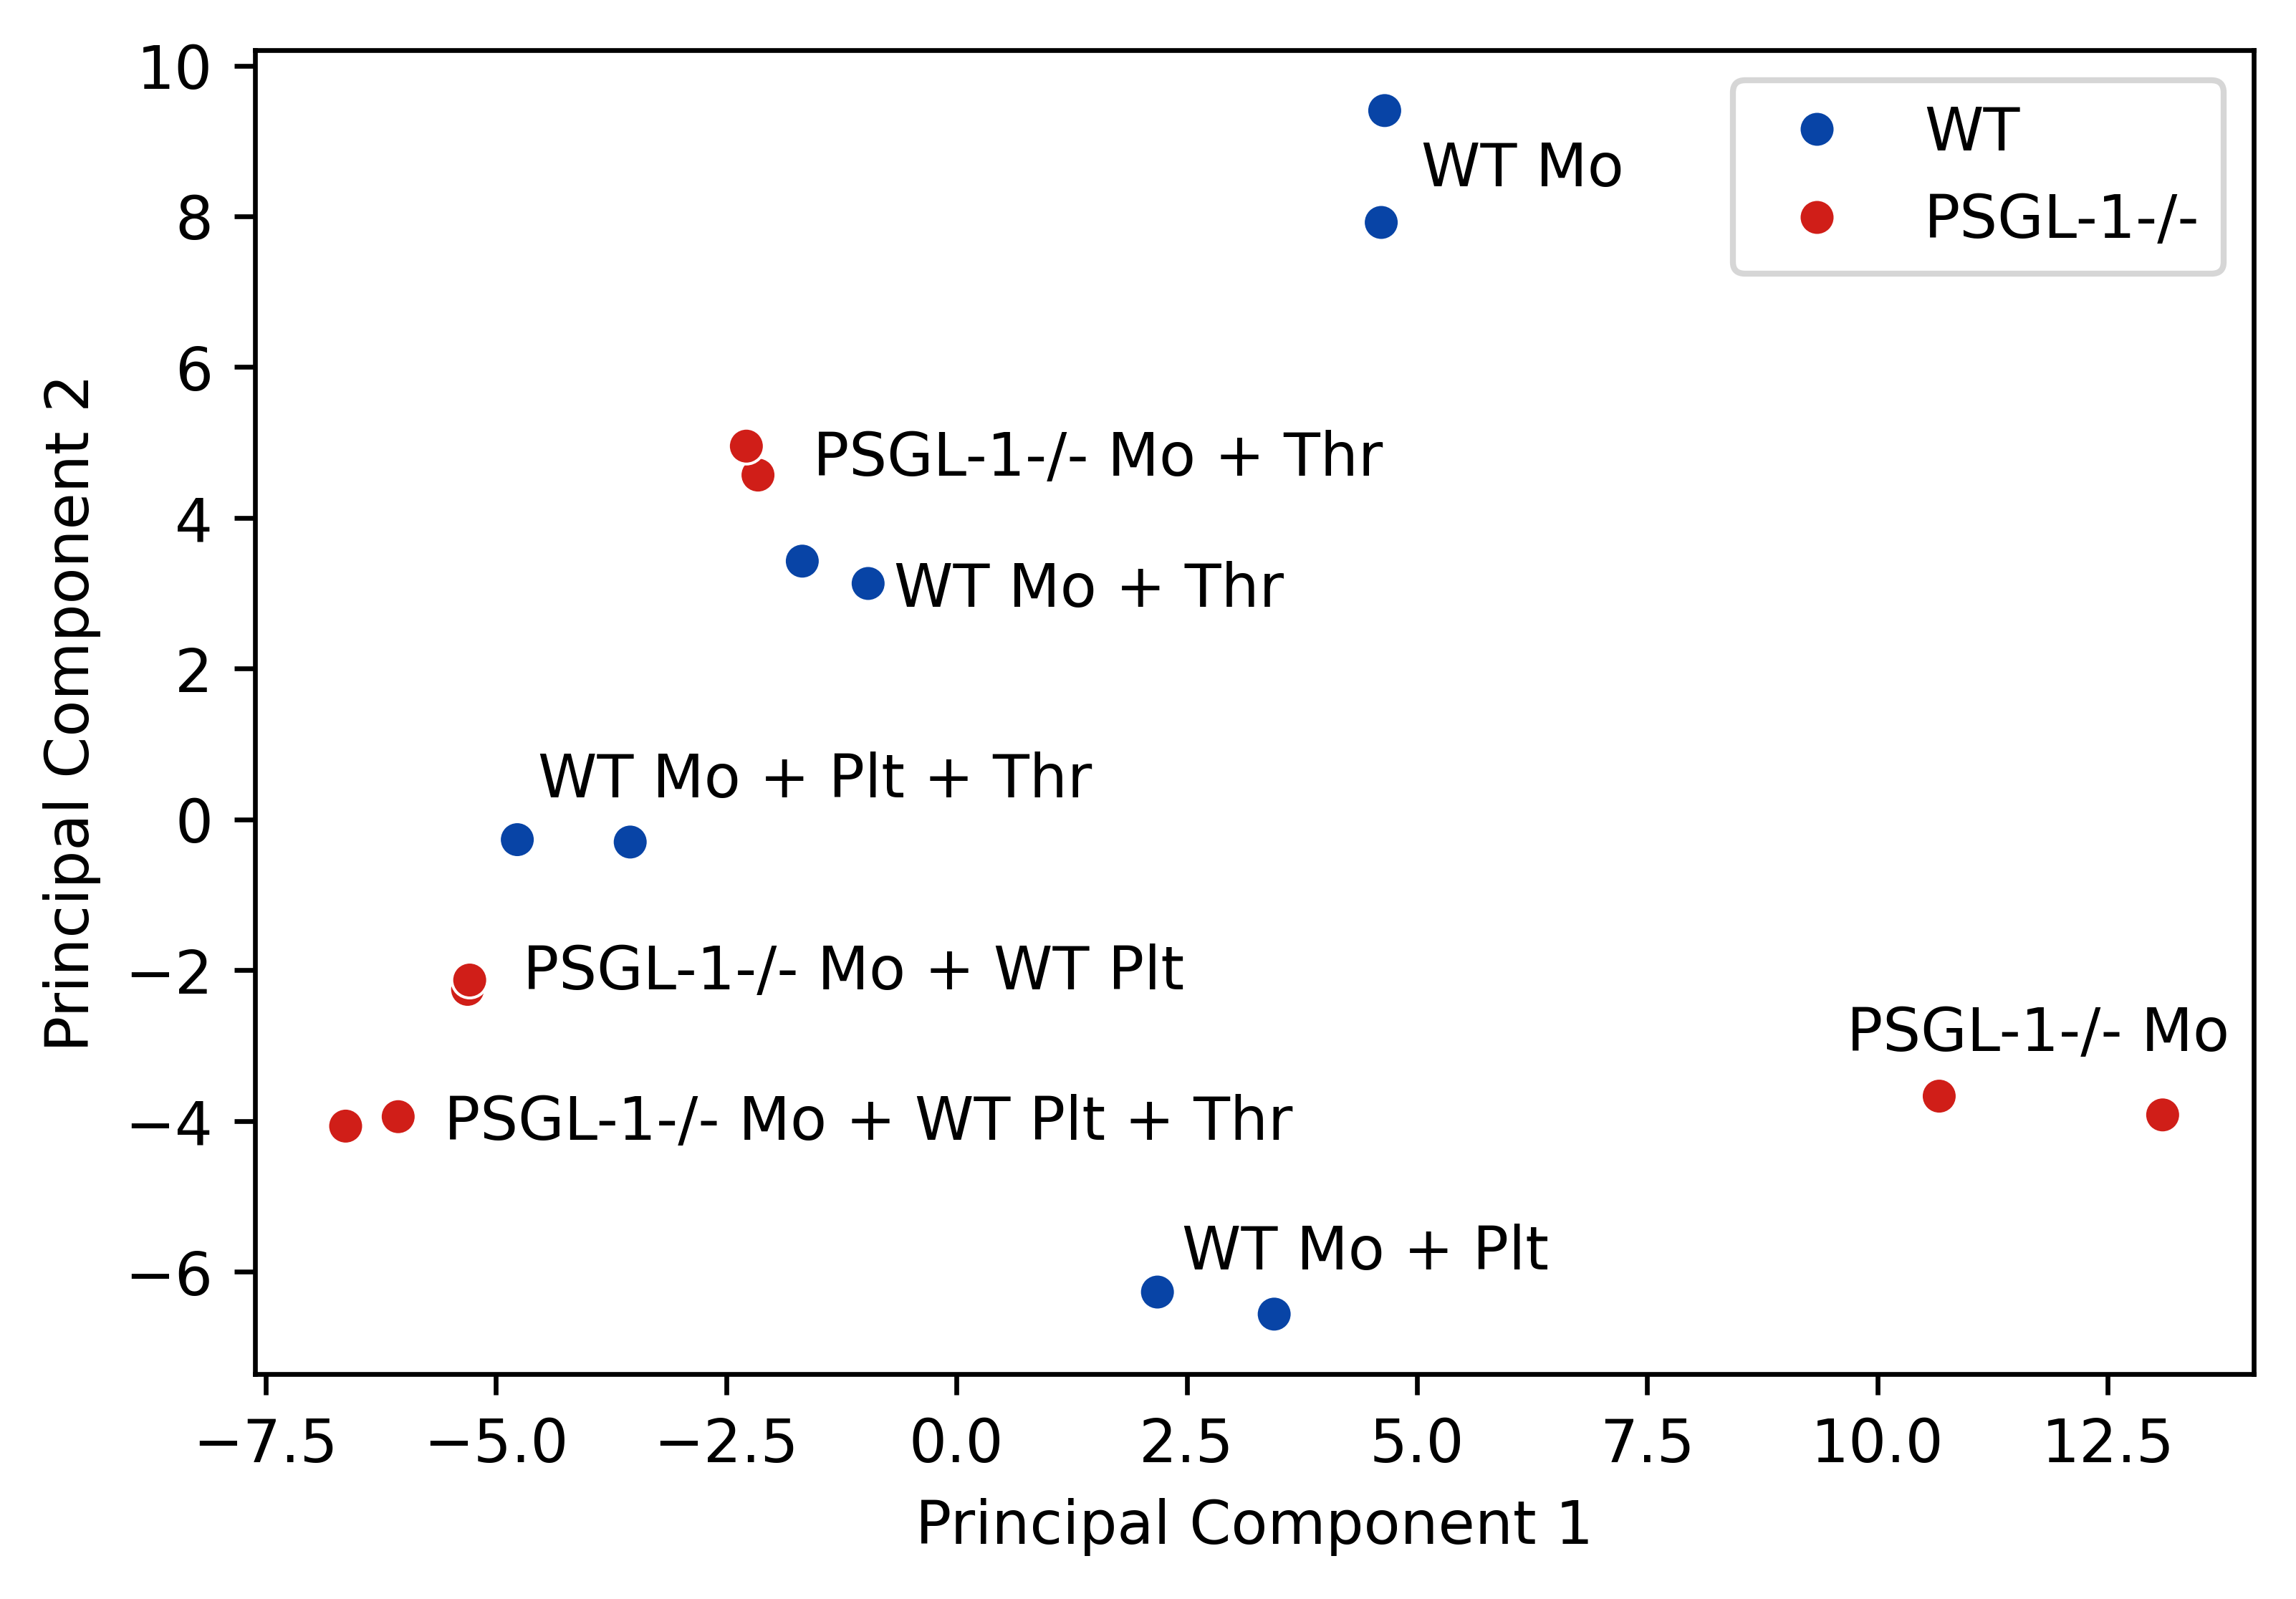

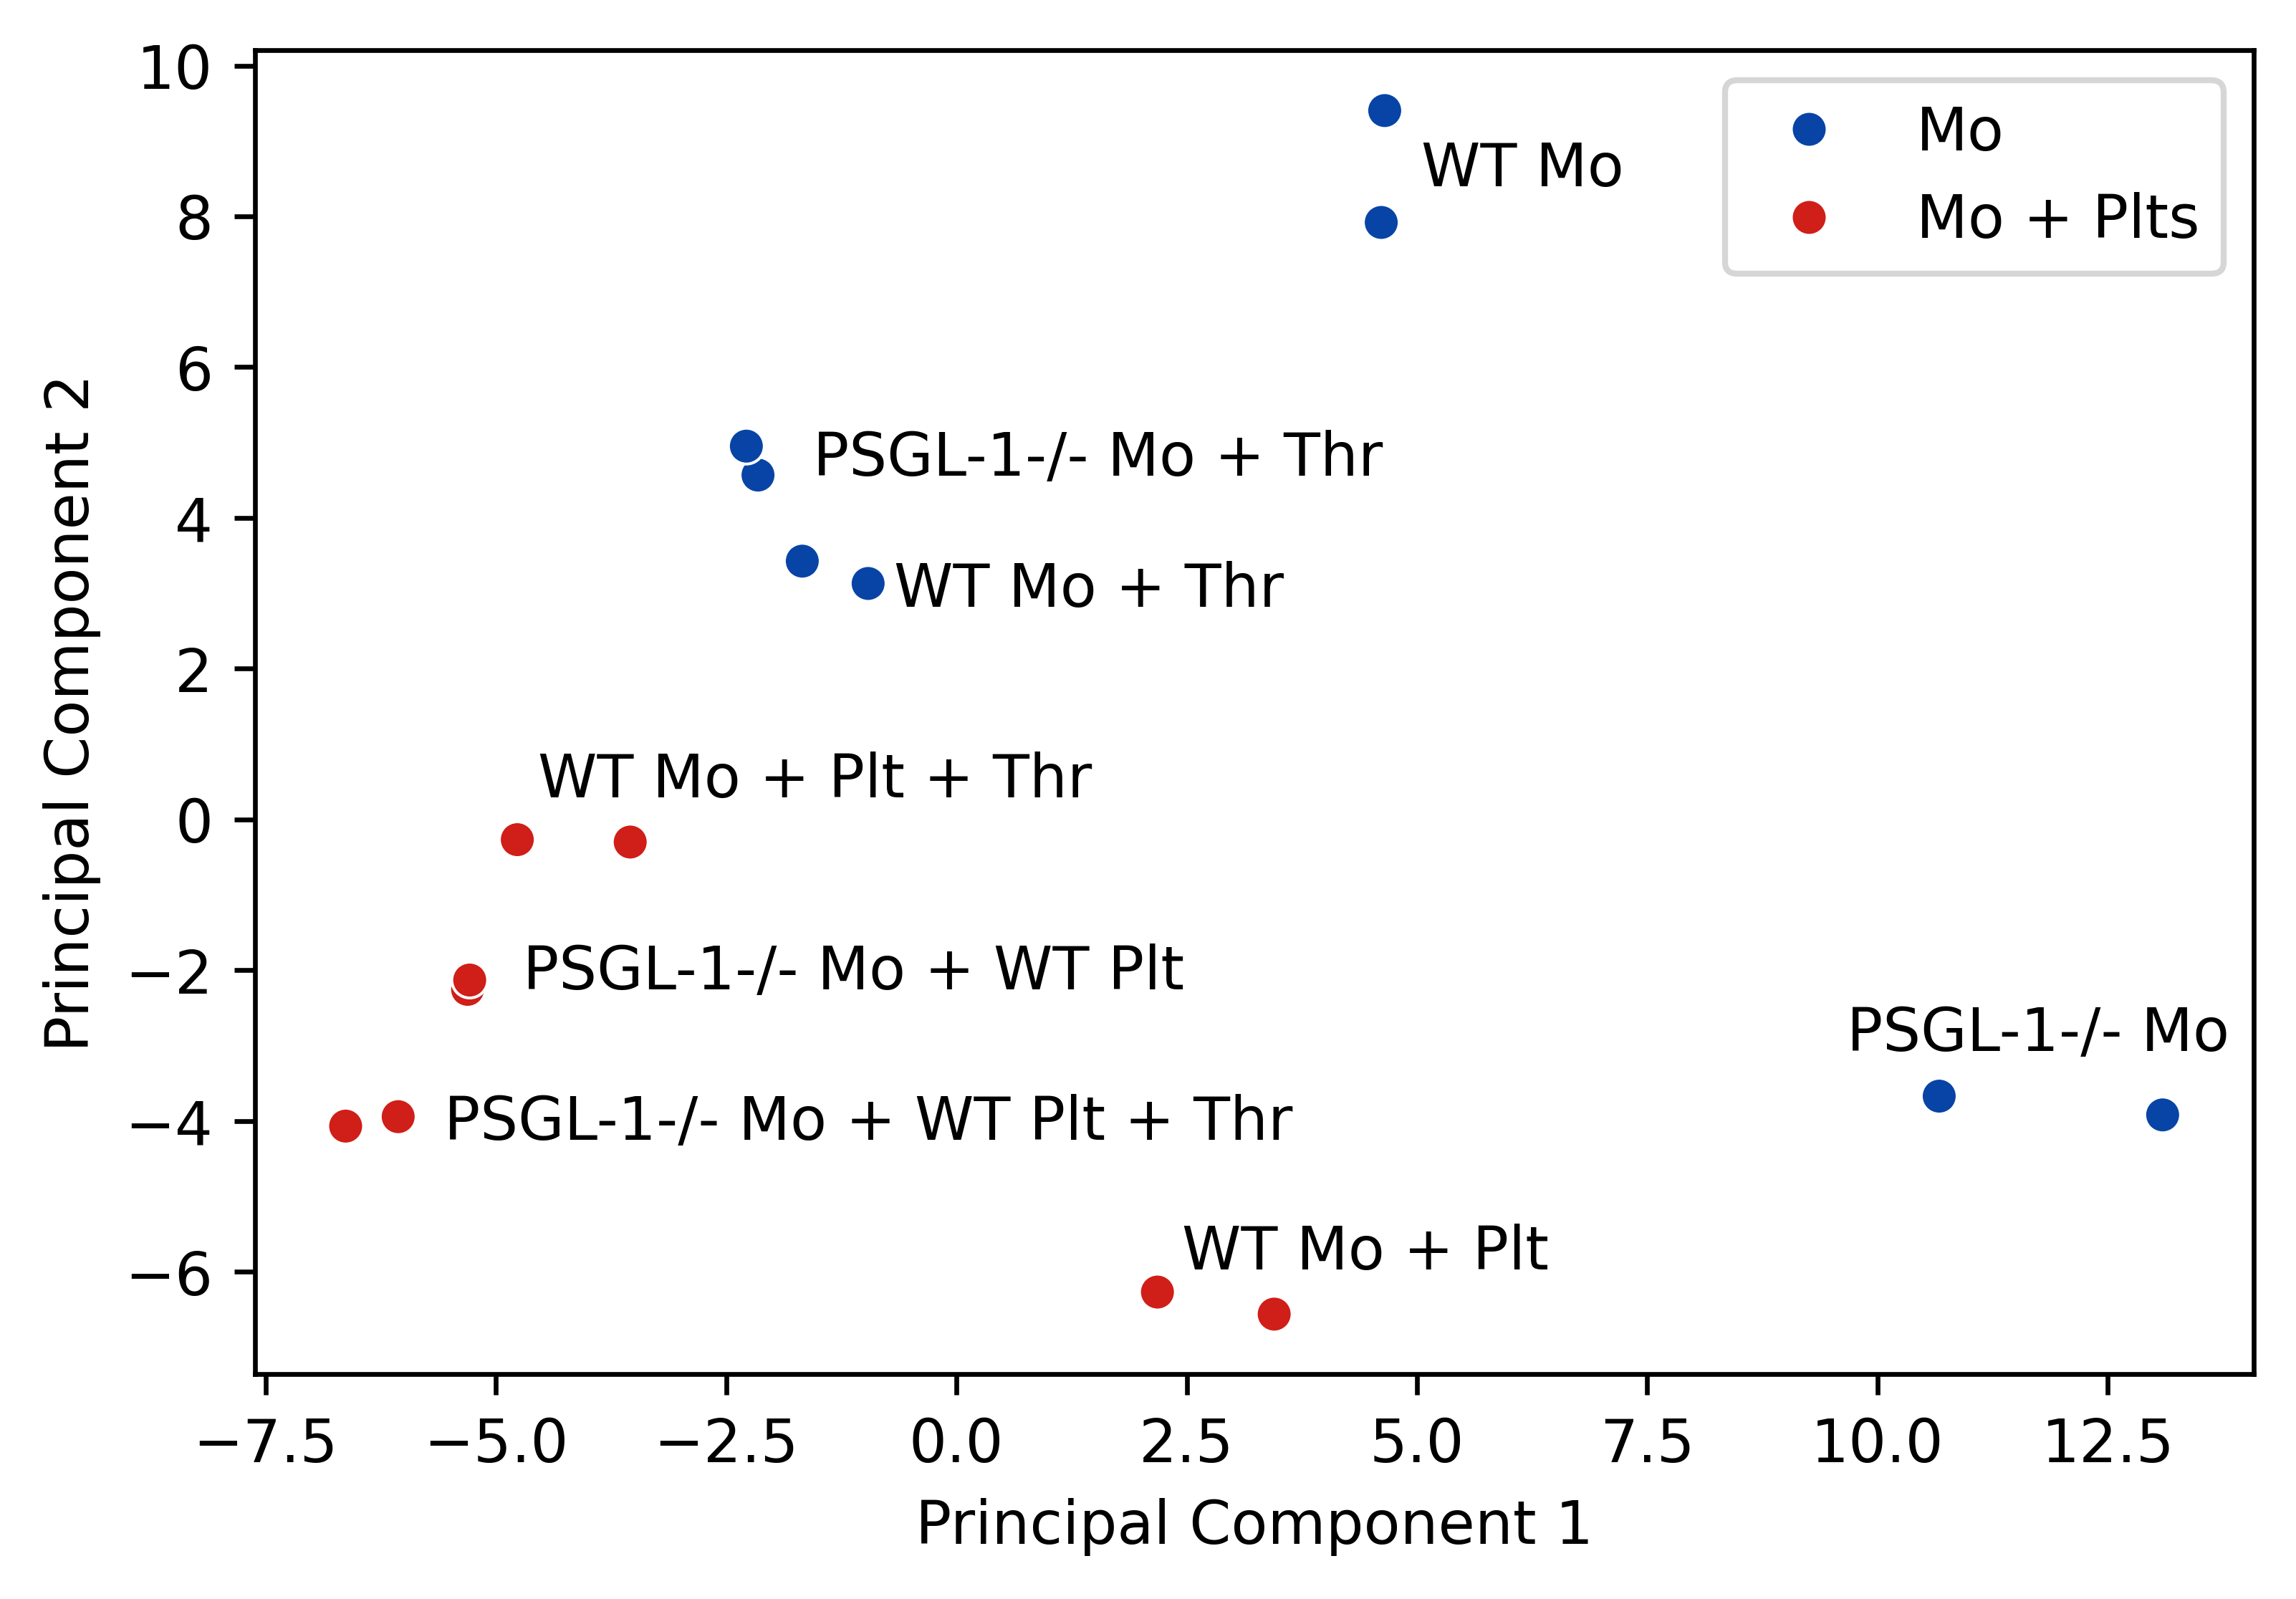

In [ ]:
### PCA

# load data
data2 = data.copy()
data2 = data2.T

strain = pd.read_excel('YC Cytokine Array Labels.xlsx')
strain = np.array(strain)
strain = strain[0:16, 2:3]
strain = strain.reshape([16,])

cell = pd.read_excel('YC Cytokine Array Labels.xlsx')
cell = np.array(cell)
cell = cell[0:16, 3:4]
cell = cell.reshape([16,])

# run PCA
data_normalized = (data2 - np.mean(data2, axis=0))/(np.std(data2, axis=0)+1)
pca = decomposition.PCA(n_components=16)
pca.fit(data_normalized)
data_transformed = pca.transform(data_normalized)

# plot explained variance
plt.rcParams['figure.figsize']
plt.figure()
explained_variance = pca.explained_variance_ratio_
ax = sns.barplot(y=explained_variance,x=[str(x+1) for x in np.arange(len(explained_variance))], palette='viridis')
ax.set_xlabel("Principal Component #"); ax.set_ylabel("Variance Explained")

# plot PC1 and PC2
plt.figure()
first_2_pcs = data_transformed[:,0:2]
ax = sns.scatterplot(x=first_2_pcs[:,0],y=first_2_pcs[:,1], hue=strain, palette=('#0844A6', '#D01E18'))
ax.set_xlabel("Principal Component 1"); ax.set_ylabel("Principal Component 2")

plt.figure()
first_2_pcs = data_transformed[:,0:2]
ax = sns.scatterplot(x=first_2_pcs[:,0],y=first_2_pcs[:,1], hue=cell, palette=('#0844A6', '#D01E18'))
ax.set_xlabel("Principal Component 1"); ax.set_ylabel("Principal Component 2")

annotations=['WT Mo', 'WT Mo', 'WT Mo + Thr', 'WT Mo + Thr', 'PSGL-1-/- Mo', 'PSGL-1-/- Mo', 'PSGL-1-/- Mo + Thr', 'PSGL-1-/- Mo + Thr', 'WT Mo + Plt', 'WT Mo + Plt', 'WT Mo + Plt + Thr', 'WT Mo + Plt + Thr', 'PSGL-1-/- Mo + WT Plt', 'PSGL-1-/- Mo + WT Plt', 'PSGL-1-/- Mo + WT Plt + Thr', 'PSGL-1-/- Mo + WT Plt + Thr']
plt.figure(figsize=(6, 4), dpi=600)
first_2_pcs = data_transformed[:,0:2]
ax = sns.scatterplot(x=first_2_pcs[:,0],y=first_2_pcs[:,1], hue=strain, palette=('#0844A6', '#D01E18'))
ax.set_xlabel("Principal Component 1"); ax.set_ylabel("Principal Component 2")
X = first_2_pcs[:,0]
Y = first_2_pcs[:,1]

for i in [0]:
    plt.annotate(annotations[i], (X[i], Y[i]), (X[i]+0.4, Y[i]-1.0))
for i in [2]:
    plt.annotate(annotations[i], (X[i], Y[i]), (X[i]+1.0, Y[i]-0.6))
for i in [4]:
    plt.annotate(annotations[i], (X[i], Y[i]), (X[i]-1.0, Y[i]+0.6))
for i in [6, 12]:
    plt.annotate(annotations[i], (X[i], Y[i]), (X[i]+0.6, Y[i]))
for i in [8, 10]:
    plt.annotate(annotations[i], (X[i], Y[i]), (X[i]-1.0, Y[i]+0.6))
for i in [14]:
    plt.annotate(annotations[i], (X[i], Y[i]), (X[i]+0.5, Y[i]-0.3))

plt.savefig('PC1vPC2_1.png', bbox_inches='tight')

annotations=['WT Mo', 'WT Mo', 'WT Mo + Thr', 'WT Mo + Thr', 'PSGL-1-/- Mo', 'PSGL-1-/- Mo', 'PSGL-1-/- Mo + Thr', 'PSGL-1-/- Mo + Thr', 'WT Mo + Plt', 'WT Mo + Plt', 'WT Mo + Plt + Thr', 'WT Mo + Plt + Thr', 'PSGL-1-/- Mo + WT Plt', 'PSGL-1-/- Mo + WT Plt', 'PSGL-1-/- Mo + WT Plt + Thr', 'PSGL-1-/- Mo + WT Plt + Thr']
plt.figure(figsize=(6, 4), dpi=600)
first_2_pcs = data_transformed[:,0:2]
ax = sns.scatterplot(x=first_2_pcs[:,0],y=first_2_pcs[:,1], hue=cell, palette=('#0844A6', '#D01E18'))
ax.set_xlabel("Principal Component 1"); ax.set_ylabel("Principal Component 2")
X = first_2_pcs[:,0]
Y = first_2_pcs[:,1]

for i in [0]:
    plt.annotate(annotations[i], (X[i], Y[i]), (X[i]+0.4, Y[i]-1.0))
for i in [2]:
    plt.annotate(annotations[i], (X[i], Y[i]), (X[i]+1.0, Y[i]-0.6))
for i in [4]:
    plt.annotate(annotations[i], (X[i], Y[i]), (X[i]-1.0, Y[i]+0.6))
for i in [6, 12]:
    plt.annotate(annotations[i], (X[i], Y[i]), (X[i]+0.6, Y[i]))
for i in [8, 10]:
    plt.annotate(annotations[i], (X[i], Y[i]), (X[i]-1.0, Y[i]+0.6))
for i in [14]:
    plt.annotate(annotations[i], (X[i], Y[i]), (X[i]+0.5, Y[i]-0.3))

plt.savefig('PC1vPC2_2.png', bbox_inches='tight')


# extract the embeddings (components) from the pca object
components = pca.components_
component_pd = pd.DataFrame(data=components, index=['PC'+str(x+1) for x in np.arange(np.shape(components)[0])], columns=data2.columns)
component_pd.head()

# compute the decreasing ordering of the magnitude of the first row (PC1)
pc1_ordering = np.argsort(np.abs(component_pd.iloc[0,:]))[::-1]

# find the 10 features most highly contributing to PC1
pc1_top_10 = component_pd.iloc[0,pc1_ordering[0:10]]
print(pc1_top_10)

# find the 10 features most highly contributing to PC2
pc2_ordering = np.argsort(np.abs(component_pd.iloc[1,:]))[::-1]
pc2_top_10 = component_pd.iloc[1,pc2_ordering[0:10]]
print(pc2_top_10)

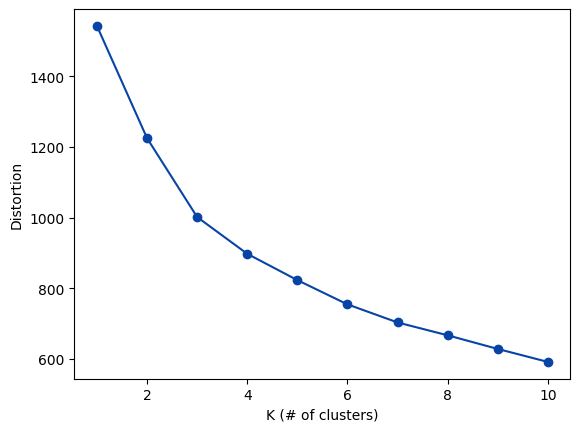

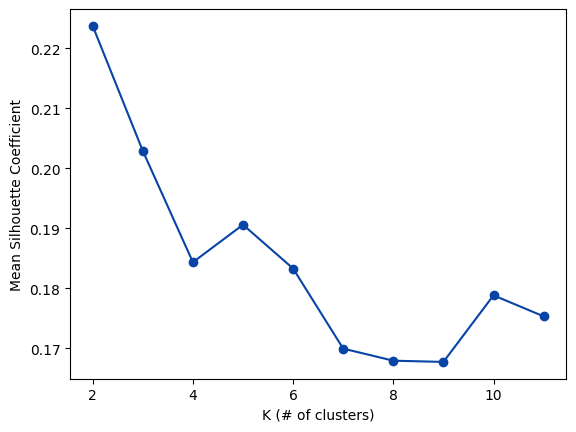

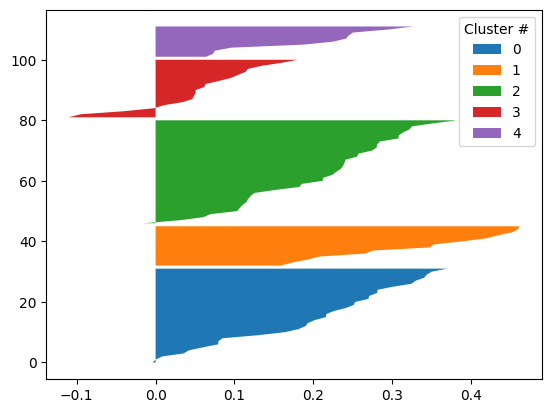

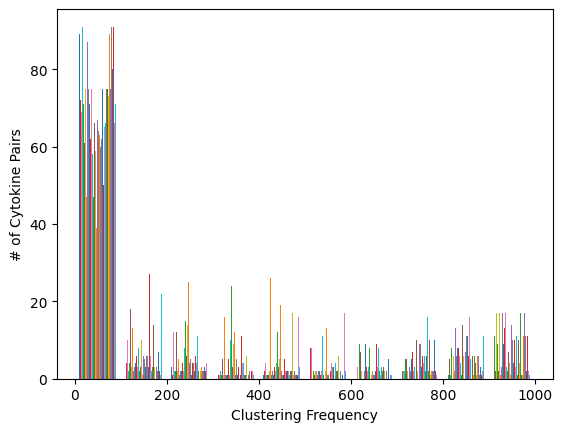

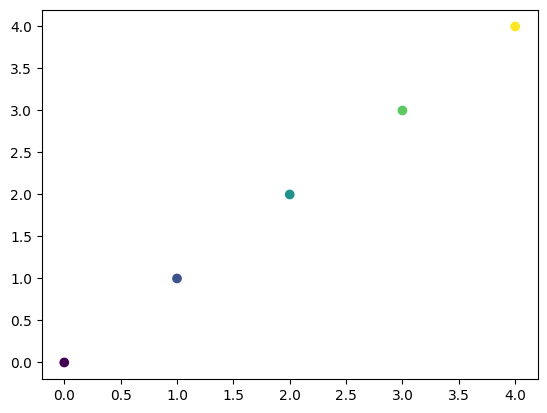

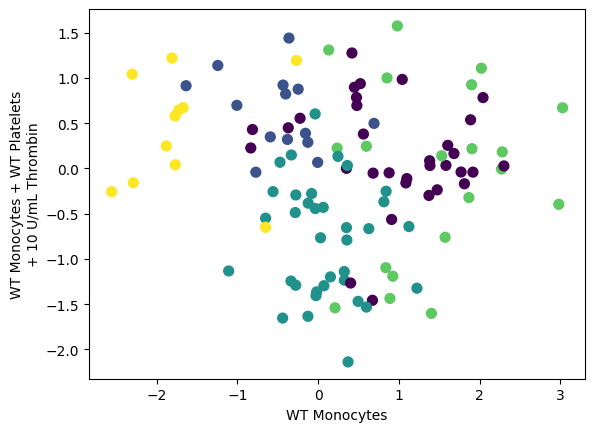

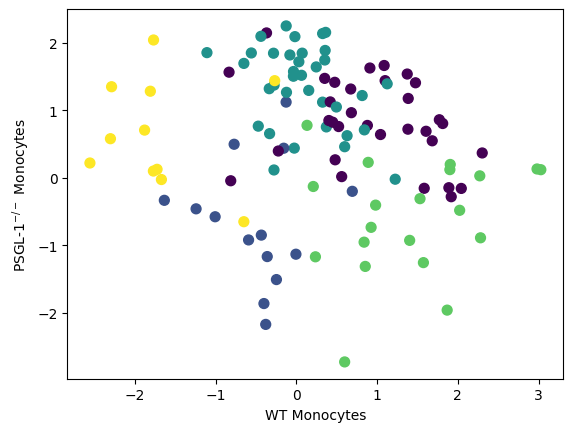

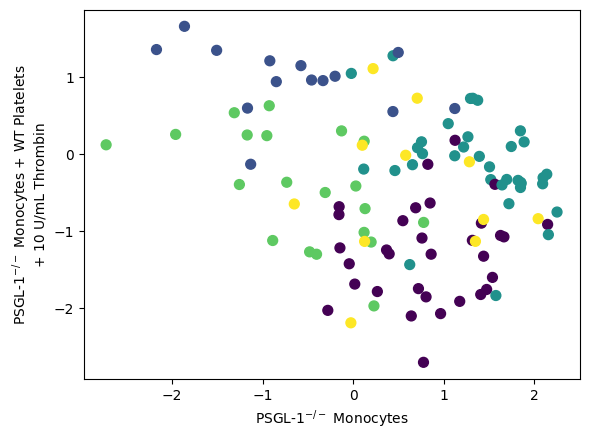

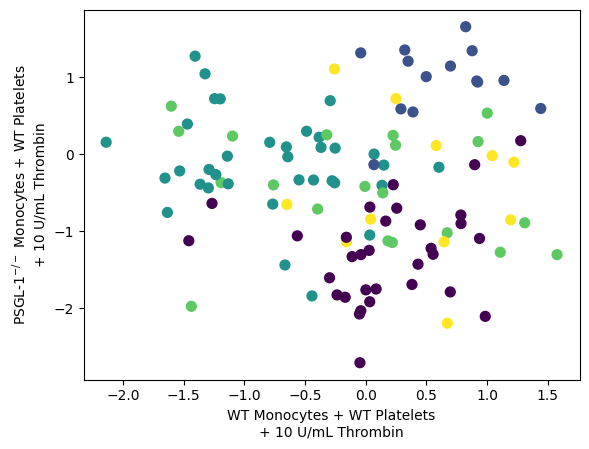

In [ ]:
### CLUSTERING

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

# K-means clustering

def calculate_distortion(input_centers, input_X):
    N_clusters = input_centers.shape[0]
    distance_to_center = np.zeros((N_clusters, input_X.shape[0]))
    for i in range(N_clusters):
        distance_to_center[i] = np.sum((input_centers[i,:]-input_X)**2, axis = 1)
    closest_center = np.min(distance_to_center, axis = 0)
    distortions = sum(closest_center)
    return distortions

# elbow plot
X = data_logtransformed_zscored
n_K = 10
distortions = np.zeros(n_K)
k_values = np.arange(1, n_K+1)
for i in range(len(k_values)):
    kmean_model = KMeans(n_clusters = k_values[i], random_state = 0, n_init = 10).fit(X)
    label = kmean_model.labels_
    centers = kmean_model.cluster_centers_
    distortions[i] = calculate_distortion(centers, X)

plt.figure()
plt.plot(k_values, distortions, 'o-', color='#0844A6')
plt.xlabel('K (# of clusters)')
plt.ylabel('Distortion')

# silhouette scores
n_K = 10
k_values = np.arange(2, n_K+2)
silhouette_scores = np.zeros(n_K)
for i in range(len(k_values)):
    kmean_model = KMeans(n_clusters = k_values[i], random_state = 0, n_init = 10).fit(X)
    label = kmean_model.labels_
    centers = kmean_model.cluster_centers_
    silhouette_scores[i] = silhouette_score(X, label)

plt.figure()
plt.plot(k_values, silhouette_scores, 'o-', color='#0844A6')
plt.xlabel('K (# of clusters)')
plt.ylabel('Mean Silhouette Coefficient')

# silhouette plots
n_K = 4
k_values = np.arange(2, n_K+2)
silhouette_scores = np.zeros(n_K)
for i in range(len(k_values)):
    kmean_model = KMeans(n_clusters = k_values[i], random_state = 0, n_init = 10).fit(X)
    label = kmean_model.labels_
    centers = kmean_model.cluster_centers_
    silhouette_scores[i] = silhouette_score(X, label)

unique_cytokine_labels = np.unique(label)
silhouette_vals = silhouette_samples(X, label)

cur_Y = 0
plt.figure()
for i in range(len(unique_cytokine_labels)):
    cur_values = np.sort(silhouette_vals[label == unique_cytokine_labels[i]])
    plt.fill_betweenx(np.arange(cur_Y, cur_Y + len(cur_values)), 0, cur_values)
    cur_Y += len(cur_values)
plt.legend(unique_cytokine_labels, loc='best', title='Cluster #')

# iterate through K-means clustering 1000x, using k = 5 (found from elbow & silhouette plots)
X = data_logtransformed_zscored
label_matrix = np.zeros([112, 1000])
for n in range(0, 1000):
    kmean_temp = KMeans(n_clusters = 5, random_state = n, n_init = 10).fit(X)
    label_matrix[:, n] = kmean_temp.labels_

m=0
n=0
o=0
together_matrix = np.zeros([112, 112])
for m in range(0, 1000):
    for n in range(0, 112):
        for o in range(0, 112):
            if label_matrix[n, m] == label_matrix[o, m]:
                together_matrix[n, o] += 1

hist, bins = np.histogram(together_matrix)
plt.figure()
plt.hist(together_matrix, bins)
plt.xlabel('Clustering Frequency')
plt.ylabel('# of Cytokine Pairs')

together_df = pd.DataFrame(together_matrix, index=X.index, columns=X.index)

# which cytokine pairs clustered together > 950 of 1000 random K-means cluster generations
together_df_filtered = together_df.where(together_df.gt(950))

# plot K-means clusters & centroids
Y = pd.DataFrame.to_numpy(X)

kmean_temp2 = KMeans(n_clusters = 5, random_state = 0, n_init = 10).fit(Y)
kmean_temp2.fit(Y)
y_kmeans = kmean_temp2.predict(Y)
centers = kmean_temp2.cluster_centers_

plt.figure()
plt.scatter([0, 1, 2, 3, 4], [0, 1, 2, 3, 4], c = [0, 1, 2, 3, 4])
plt.show()

plt.figure()
plt.scatter(Y[:,0], Y[:,10], c=y_kmeans, s=50)
#plt.scatter(centers[:,0], centers[:,10], c='black', s=50)
plt.xlabel('WT Monocytes')
plt.ylabel('WT Monocytes + WT Platelets' + '\n' + '+ 10 U/mL Thrombin')

plt.figure()
plt.scatter(Y[:,0], Y[:,4], c=y_kmeans, s=50)
plt.xlabel('WT Monocytes')
plt.ylabel('PSGL-1$^{-/-}$ Monocytes')
plt.show()

plt.figure()
plt.scatter(Y[:,4], Y[:,14], c=y_kmeans, s=50)
plt.xlabel('PSGL-1$^{-/-}$ Monocytes')
plt.ylabel('PSGL-1$^{-/-}$ Monocytes + WT Platelets' + '\n' + '+ 10 U/mL Thrombin')
plt.show()

plt.figure()
plt.scatter(Y[:,10], Y[:,14], c=y_kmeans, s=50)
plt.xlabel('WT Monocytes + WT Platelets' + '\n' + '+ 10 U/mL Thrombin')
plt.ylabel('PSGL-1$^{-/-}$ Monocytes + WT Platelets' + '\n' + '+ 10 U/mL Thrombin')
plt.show()

# sort cytokines by cluster

cytokines_and_labels = np.zeros([112, 2], dtype=object)
cytokines_and_labels[:,0] = X.index
cytokines_and_labels[:,1] = label_matrix[:, 0]

cytokines_and_labels_df = pd.DataFrame(cytokines_and_labels, columns = ['Cytokine', 'Label'])
cytokines_and_labels_df = cytokines_and_labels_df.sort_values(by = ['Label'])